In [41]:
#import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load data
df = pd.read_csv('....../My Projects/healthcare_dataset.csv')
print("Shape: ", df.shape)
print(df.info())
print(df.head())


Shape:  (55500, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(1

In [42]:
# standardize column names
df.columns = [col.strip().lower().replace(" ","_") for col in df.columns]


#assigning correct data types
date_cols = ['date_of_admission','discharge_date']

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors = 'coerce')

df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   name                55500 non-null  object        
 1   age                 55500 non-null  int64         
 2   gender              55500 non-null  object        
 3   blood_type          55500 non-null  object        
 4   medical_condition   55500 non-null  object        
 5   date_of_admission   55500 non-null  datetime64[ns]
 6   doctor              55500 non-null  object        
 7   hospital            55500 non-null  object        
 8   insurance_provider  55500 non-null  object        
 9   billing_amount      55500 non-null  float64       
 10  room_number         55500 non-null  int64         
 11  admission_type      55500 non-null  object        
 12  discharge_date      55500 non-null  datetime64[ns]
 13  medication          55500 non-null  object    

In [43]:
#check for null values
print("Missing Values Count:")
df.isnull().sum()

Missing Values Count:


name                  0
age                   0
gender                0
blood_type            0
medical_condition     0
date_of_admission     0
doctor                0
hospital              0
insurance_provider    0
billing_amount        0
room_number           0
admission_type        0
discharge_date        0
medication            0
test_results          0
dtype: int64

In [44]:
#check for duplicates
duplicate_records= df.duplicated(subset=['name', 'date_of_admission','doctor', 'room_number'], keep=False)
duplicate_records.sum()

11000

In [45]:
df = df.drop_duplicates(subset = ['name', 'date_of_admission','doctor', 'room_number'], keep = 'first')

print(f"Total rows after cleaning: {len(df)}")

Total rows after cleaning: 50000


In [46]:
df.to_csv('healthcare_dataset_clean.csv',index = False)
print("Data cleaning complete")

Data cleaning complete


#### Exploratory Data Analysis

In [47]:
#reading data
pd.set_option("display.max_columns", None)

df = pd.read_csv('healthcare_dataset_clean.csv')

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                50000 non-null  object 
 1   age                 50000 non-null  int64  
 2   gender              50000 non-null  object 
 3   blood_type          50000 non-null  object 
 4   medical_condition   50000 non-null  object 
 5   date_of_admission   50000 non-null  object 
 6   doctor              50000 non-null  object 
 7   hospital            50000 non-null  object 
 8   insurance_provider  50000 non-null  object 
 9   billing_amount      50000 non-null  float64
 10  room_number         50000 non-null  int64  
 11  admission_type      50000 non-null  object 
 12  discharge_date      50000 non-null  object 
 13  medication          50000 non-null  object 
 14  test_results        50000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 5.7

In [48]:
#Convert columns to datetime
date_cols = ['date_of_admission','discharge_date']

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors = 'coerce')
    

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   name                50000 non-null  object        
 1   age                 50000 non-null  int64         
 2   gender              50000 non-null  object        
 3   blood_type          50000 non-null  object        
 4   medical_condition   50000 non-null  object        
 5   date_of_admission   50000 non-null  datetime64[ns]
 6   doctor              50000 non-null  object        
 7   hospital            50000 non-null  object        
 8   insurance_provider  50000 non-null  object        
 9   billing_amount      50000 non-null  float64       
 10  room_number         50000 non-null  int64         
 11  admission_type      50000 non-null  object        
 12  discharge_date      50000 non-null  datetime64[ns]
 13  medication          50000 non-null  object    

In [31]:
# General info
print(df.shape)
print(df.describe())

(50000, 15)
                age              date_of_admission  billing_amount  \
count  50000.000000                          50000    50000.000000   
mean      51.580360  2021-11-01 07:31:59.231999744    25555.691557   
min       18.000000            2019-05-08 00:00:00    -2008.492140   
25%       35.000000            2020-07-28 18:00:00    13239.403094   
50%       52.000000            2021-11-01 00:00:00    25541.302839   
75%       68.000000            2023-02-02 00:00:00    37853.996819   
max       85.000000            2024-05-07 00:00:00    52764.276736   
std       19.582194                            NaN    14215.932247   

        room_number                 discharge_date  
count  50000.000000                          50000  
mean     301.032260  2021-11-16 19:32:47.616000256  
min      101.000000            2019-05-09 00:00:00  
25%      202.000000            2020-08-13 00:00:00  
50%      302.000000            2021-11-17 00:00:00  
75%      400.000000            2023-02-

In [32]:
#count of unique values in categorical columns
for col in df.select_dtypes(include = "object").columns:
    print(f"{col} unique values :")
    print(df[col].value_counts().head(10))

name unique values :
name
Michael Williams     22
Michael Smith        21
Robert Smith         21
James Smith          17
John Smith           16
James Brown          15
Matthew Smith        15
James Williams       14
Christopher Smith    14
Michael Jones        14
Name: count, dtype: int64
gender unique values :
gender
Female    25011
Male      24989
Name: count, dtype: int64
blood_type unique values :
blood_type
AB+    6291
B+     6278
A-     6261
AB-    6259
A+     6246
O+     6235
B-     6230
O-     6200
Name: count, dtype: int64
medical_condition unique values :
medical_condition
Arthritis       8439
Diabetes        8384
Hypertension    8319
Cancer          8294
Obesity         8292
Asthma          8272
Name: count, dtype: int64
doctor unique values :
doctor
Michael Smith        24
John Smith           21
Robert Smith         19
Michael Johnson      19
David Smith          18
Robert Johnson       17
Michael Williams     17
James Smith          17
Christopher Smith    16
Matthew Sm

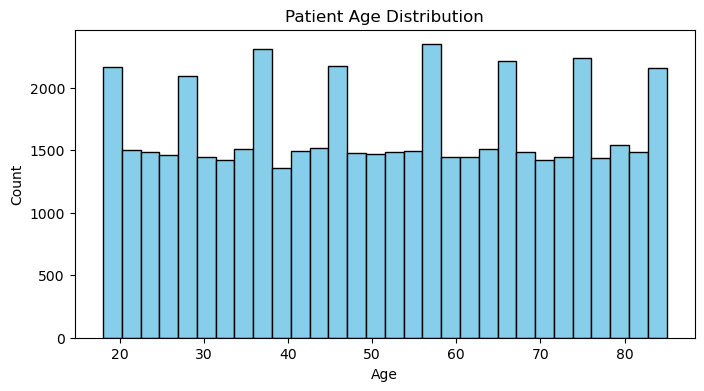

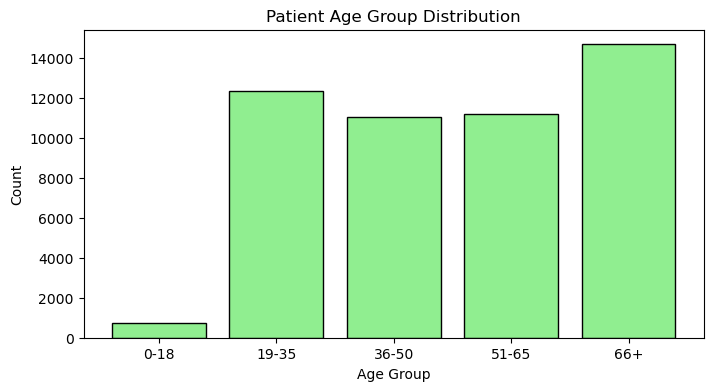

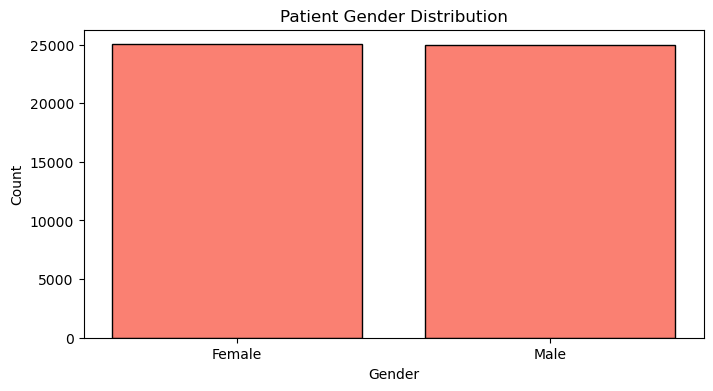

In [33]:
# Age distribution
plt.figure(figsize=(8,4))
plt.hist(df['age'], bins=30, color = "skyblue", edgecolor = "black")
plt.title("Patient Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()



#age groups
bins = [0,18,35,50,65,100]
labels = ['0-18','19-35','36-50','51-65','66+']

df['age_group'] = pd.cut(df['age'],bins=bins,labels=labels)
age_group_counts = df['age_group'].value_counts().reindex(labels)
plt.figure(figsize=(8,4))
plt.bar(age_group_counts.index, age_group_counts.values, color='lightgreen', edgecolor='black')
plt.title("Patient Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()



# Gender distribution
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(8,4))
plt.bar(gender_counts.index, gender_counts.values,color = "salmon", edgecolor = "black")
plt.title("Patient Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

count    50000.000000
mean        15.500560
std          8.651385
min          1.000000
25%          8.000000
50%         15.000000
75%         23.000000
max         30.000000
Name: length_of_stay, dtype: float64


C:\Users\Suhas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


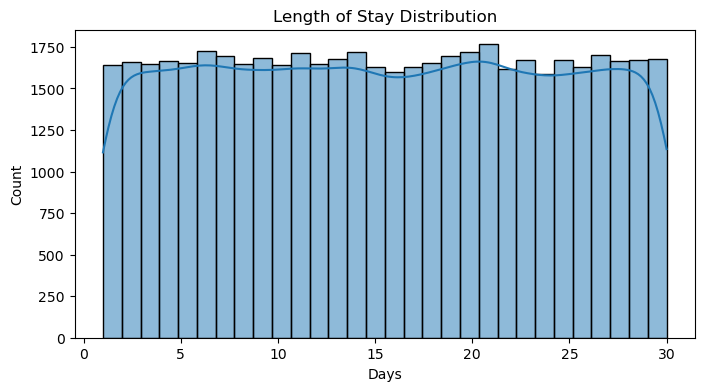

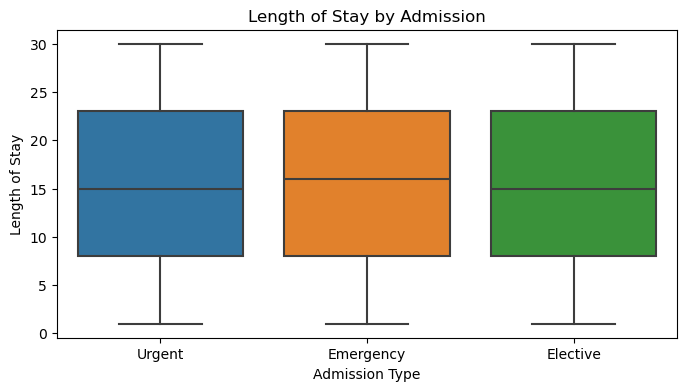

In [34]:
#Length of stay analysis

df['length_of_stay'] = (df['discharge_date'] - df['date_of_admission']).dt.days
print(df['length_of_stay'].describe())

plt.figure(figsize=(8,4))
sns.histplot(df['length_of_stay'],bins = 30, kde =True)
plt.title("Length of Stay Distribution")
plt.xlabel("Days")
plt.show()


#Length of stay vs Admission type
if 'admission_type' in df.columns:
    plt.figure(figsize = (8,4))
    sns.boxplot(x = 'admission_type', y='length_of_stay', data = df)
    plt.title('Length of Stay by Admission')
    plt.xlabel('Admission Type')
    plt.ylabel('Length of Stay')
    plt.show()

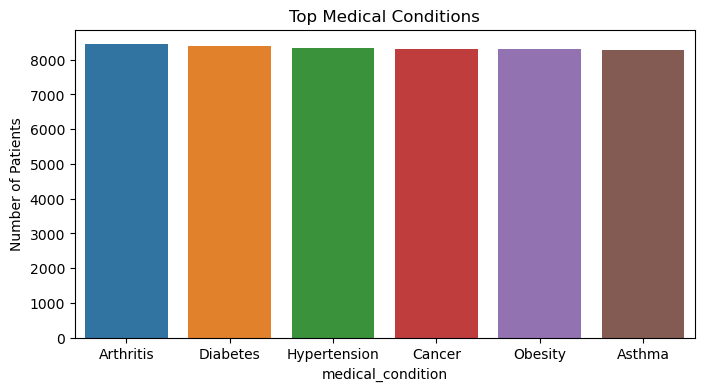

In [35]:
#Most common conditions
top_conditions = df['medical_condition'].value_counts().head(10)
plt.figure(figsize = (8,4))
sns.barplot(y = top_conditions.values, x = top_conditions.index)
plt.title("Top Medical Conditions")
plt.ylabel("Number of Patients")
plt.show()

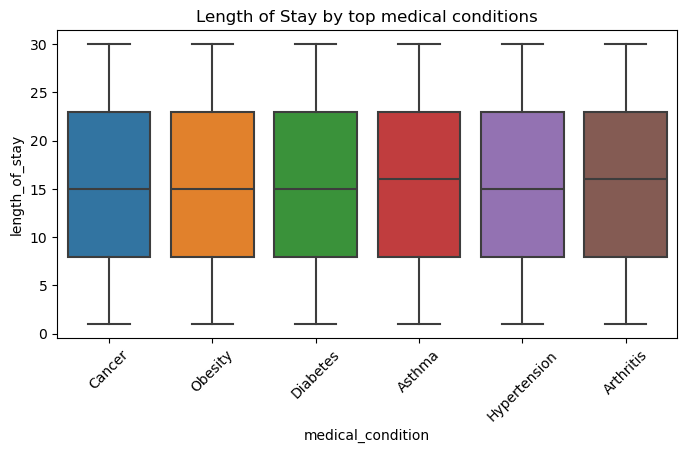

In [36]:
#condition vs length of stay
plt.figure(figsize = (8,4))
sns.boxplot(x = 'medical_condition' , y='length_of_stay', data = df[df['medical_condition'].isin(top_conditions.index)])
plt.xticks(rotation = 45)
plt.title("Length of Stay by top medical conditions")
plt.show()

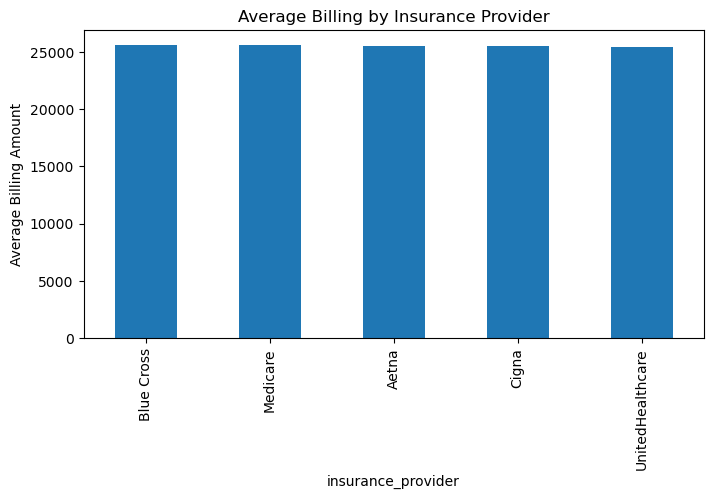

In [39]:
#Average billing per insurance provider
average_billing_insurance = df.groupby('insurance_provider')['billing_amount'].mean().sort_values(ascending=False)
plt.figure(figsize = (8,4))
average_billing_insurance.plot(kind = 'bar')
plt.title('Average Billing by Insurance Provider')
plt.ylabel('Average Billing Amount')
plt.show()


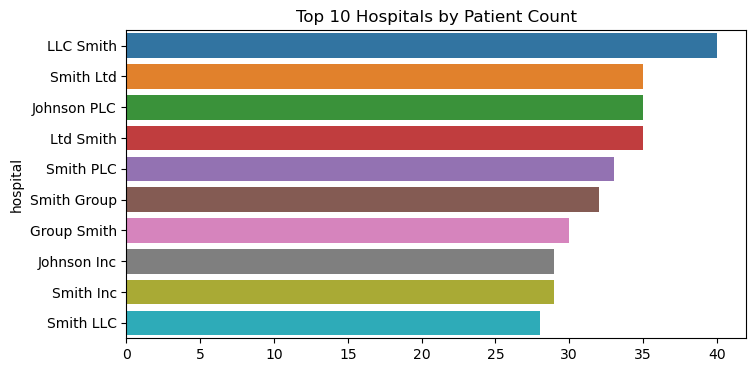

In [38]:
#patients per hospital
top_hospitals = df['hospital'].value_counts().head(10)
plt.figure(figsize = (8,4))
sns.barplot(y=top_hospitals.index , x=top_hospitals.values)
plt.title('Top 10 Hospitals by Patient Count')
plt.show()